In [42]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Import pandas and read the charity_data.csv from the provided cloud URL.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df = application_df.drop(columns=['EIN', 'NAME'])
df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
df.nunique()

,0
APPLICATION_TYPE,17
AFFILIATION,6
CLASSIFICATION,71
USE_CASE,5
ORGANIZATION,4
STATUS,2
INCOME_AMT,9
SPECIAL_CONSIDERATIONS,2
ASK_AMT,8747
IS_SUCCESSFUL,2


In [4]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [6]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
...,...
C1248,1
C6100,1
C1820,1


In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
df['CLASSIFICATION'].value_counts().loc[lambda x : x>1]

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116


In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = ['C7000', 'C1700', 'C4000', 'C5000', 'C1270', 'C2700', 'C2800']

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
...,...
C1248,1
C6100,1
C1820,1


In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
df= pd.get_dummies(df)
df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [10]:
# Split our preprocessed data into our features and target arrays
y = df['IS_SUCCESSFUL']
X = df.drop(columns='IS_SUCCESSFUL')

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_2= tf.keras.models.Sequential()

# First hidden layer
nn_2.add(tf.keras.layers.Dense(units=70, activation="relu", input_dim=116))

# Second hidden layer
nn_2.add(tf.keras.layers.Dense(units=50, activation="relu"))

# Output layer
nn_2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 70)             │         8,190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         3,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,791 (46.06 KB)

 Trainable params: 11,791 (46.06 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Compile the model
nn_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
# Train the model
history_2=nn_2.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7472 - loss: 0.5239 - val_accuracy: 0.7481 - val_loss: 0.5181
Epoch 2/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7405 - loss: 0.5300 - val_accuracy: 0.7491 - val_loss: 0.5189
Epoch 3/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7463 - loss: 0.5241 - val_accuracy: 0.7466 - val_loss: 0.5193
Epoch 4/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7458 - loss: 0.5253 - val_accuracy: 0.7473 - val_loss: 0.5204
Epoch 5/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7465 - loss: 0.5227 - val_accuracy: 0.7456 - val_loss: 0.5243
Epoch 6/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7400 - loss: 0.5283 - val_accuracy: 0.7456 - val_loss: 0.5227
Epoch 7/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7420 - loss: 0.5246 - val_accuracy: 0.7452 - val_loss: 0.5239
Epoch 8/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7468 - loss: 0.5227 - val_accu

In [28]:
model_loss, model_accuracy = nn_2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 2ms/step - accuracy: 0.7296 - loss: 0.6261
Loss: 0.626119077205658, Accuracy: 0.7295626997947693


In [29]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_3= tf.keras.models.Sequential()

# First hidden layer
nn_3.add(tf.keras.layers.Dense(units=90, activation="relu", input_dim=116))

# Second hidden layer
nn_3.add(tf.keras.layers.Dense(units=40, activation="relu"))
nn_3.add(tf.keras.layers.Dense(units=20, activation="relu"))
nn_3.add(tf.keras.layers.Dense(units=10, activation="relu"))

# Output layer
nn_3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_3.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 90)             │        10,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 40)             │         3,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,211 (59.42 KB)

 Trainable params: 15,211 (59.42 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Compile the model
nn_3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
history_3=nn_3.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7096 - loss: 0.5953 - val_accuracy: 0.7328 - val_loss: 0.5550
Epoch 2/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7284 - loss: 0.5555 - val_accuracy: 0.7337 - val_loss: 0.5490
Epoch 3/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7290 - loss: 0.5493 - val_accuracy: 0.7374 - val_loss: 0.5465
Epoch 4/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7319 - loss: 0.5495 - val_accuracy: 0.7357 - val_loss: 0.5507
Epoch 5/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7341 - loss: 0.5455 - val_accuracy: 0.7347 - val_loss: 0.5498
Epoch 6/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7303 - loss: 0.5431 - val_accuracy: 0.7382 - val_loss: 0.5474
Epoch 7/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7349 - loss: 0.5449 - val_accuracy: 0.7388 - val_loss: 0.5465
Epoch 8/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7361 - loss: 0.5415 - val_accu

In [32]:
model_loss, model_accuracy = nn_3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - 2ms/step - accuracy: 0.7312 - loss: 0.5652
Loss: 0.5652477145195007, Accuracy: 0.731195330619812


In [33]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_4= tf.keras.models.Sequential()

# First hidden layer
nn_4.add(tf.keras.layers.Dense(units=90, activation="relu", input_dim=116))

# Second hidden layer
nn_4.add(tf.keras.layers.Dense(units=20, activation="sigmoid"))

# Output layer
nn_4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 90)             │        10,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 20)             │         1,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,371 (48.32 KB)

 Trainable params: 12,371 (48.32 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Compile the model
nn_4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [35]:
history_4=nn_4.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50)

Epoch 1/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6879 - loss: 0.6044 - val_accuracy: 0.7335 - val_loss: 0.5551
Epoch 2/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7242 - loss: 0.5610 - val_accuracy: 0.7337 - val_loss: 0.5492
Epoch 3/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7273 - loss: 0.5518 - val_accuracy: 0.7343 - val_loss: 0.5493
Epoch 4/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7326 - loss: 0.5433 - val_accuracy: 0.7345 - val_loss: 0.5488
Epoch 5/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7330 - loss: 0.5468 - val_accuracy: 0.7355 - val_loss: 0.5469
Epoch 6/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7282 - loss: 0.5491 - val_accuracy: 0.7361 - val_loss: 0.5478
Epoch 7/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7335 - loss: 0.5467 - val_accuracy: 0.7328 - val_loss: 0.5468
Epoch 8/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7286 - loss: 0.5460 - val_accuracy: 0.

In [36]:
model_loss, model_accuracy = nn_4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 2ms/step - accuracy: 0.7294 - loss: 0.5536
Loss: 0.5536279678344727, Accuracy: 0.7294460535049438


In [37]:
nn_2.save("AlphabetSoupCharity_Optimization.h5")

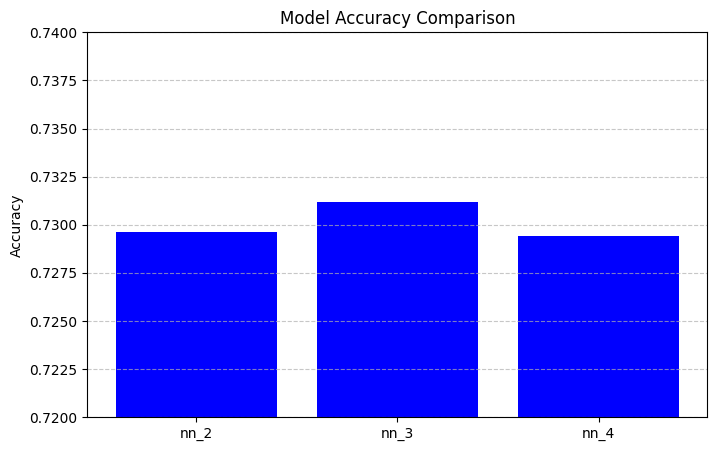

In [43]:
model_names = ['nn_2', 'nn_3', 'nn_4']
accuracies = [0.7296, 0.7312, 0.7294]

plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracies, color='blue')
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0.72, 0.74)
plt.grid(axis='y', linestyle='--', alpha=0.7)